# Customer Segmentation using K-Means

This notebook focuses on segmenting customers using the K-Means clustering algorithm.

The objective is to identify **distinct customer groups** based on demographic and behavioral features, and to ensure that the resulting segmentation is both **statistically reasonable** and **business-interpretable**.

### Workflow overview:
1. Feature selection and standardization
2. Determination of the optimal number of clusters (K)
   - Elbow Method
   - Silhouette Analysis
3. Final K-Means clustering
4. Visual inspection of customer segments

The number of clusters is selected by balancing **quantitative clustering metrics** with **practical interpretability**, rather than purely maximizing metric values.

In [12]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")

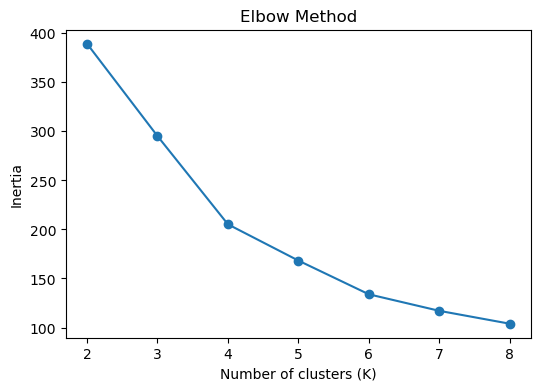

In [23]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features so that each variable has mean 0 and variance 1,
# preventing variables with larger scales from dominating distance-based clustering.

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Based on the elbow method, the decrease in inertia becomes noticeably less pronounced after K=4, 
suggesting diminishing returns when adding more clusters

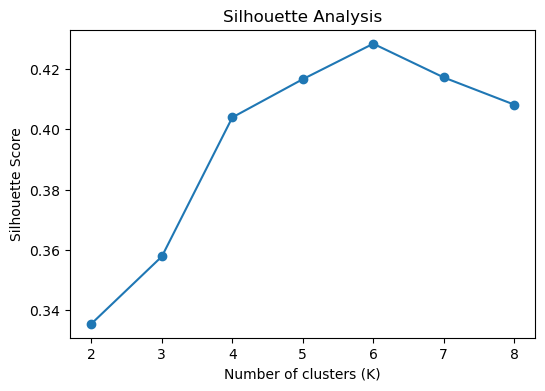

In [14]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

Although K=5 and K=6 achieve slightly higher silhouette scores, the improvement over K=4 is marginal. 
Considering interpretability and practical usability, K=4 provides a more balanced solution.

Based on the elbow method and silhouette analysis, K=4 is selected
as a balanced choice between cluster separation and interpretability.

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


K-means clustering (K=4) is applied to standardized features.
After clustering, each customer is assigned a segment label,
and cluster-wise mean values are calculated to interpret
the characteristics of each customer group.

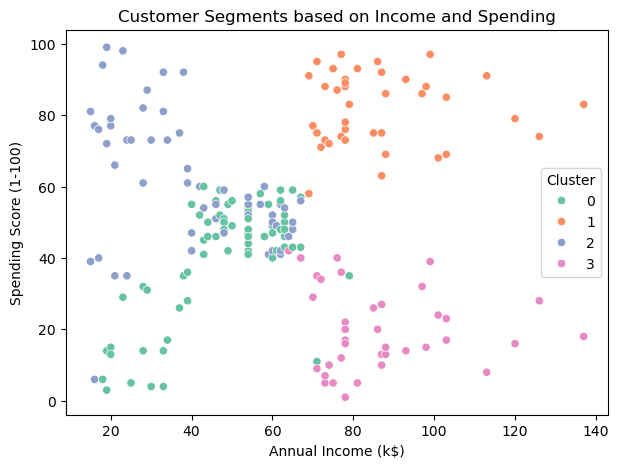

In [24]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title('Customer Segments based on Income and Spending')
plt.show()

The 2D visualization clearly shows four well-separated customer segments, 
particularly distinguishing high-income customers with different spending behaviors, which supports the choice of K=4.

In [22]:
import os
os.makedirs("data", exist_ok=True)

df.to_csv("data/customers_with_clusters.csv", index=False)